In [8]:
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [9]:
# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('test.stl')

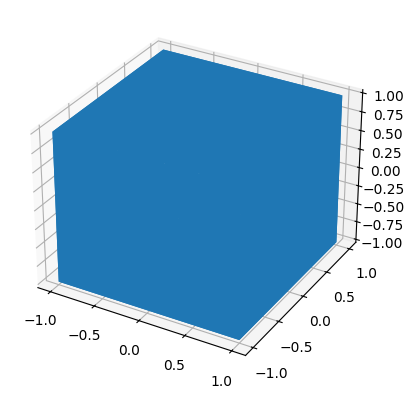

In [10]:
# Create a new plot using plt
figure = plt.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(r'C:\Users\connor\PycharmProjects\3d_printing\test.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

In [11]:
# create plot using plotly
import plotly.graph_objects as go
from stl import mesh  # numpy-stl
import numpy as np

data = mesh.Mesh.from_file(r'C:\Users\connor\PycharmProjects\3d_printing\test.stl')

points = data.vectors.reshape(-1,3)  # reshape Nx3x3 to N*3x3 to convert polygons to points
faces_index = np.arange(len(points))  # get indexes of points

fig = go.Figure(data=[
    go.Mesh3d(
        x = points[:,0],  # pass first column of points array
        y = points[:,1],  # .. second column
        z = points[:,2],  # .. third column
        # i, j and k give the vertices of triangles
        i = faces_index[0::3],  # indexes of the points. k::3 means pass every third element 
        j = faces_index[1::3],  # starting from k element
        k = faces_index[2::3],  # for example 2::3 in arange would be 2,5,8,...
        opacity = .9
    )
])

fig.show()